In [1]:
import time
import pandas as pd
import csv
import numpy as np
import re
import matplotlib.pyplot as plt

fired = pd.read_csv('../data/fired.csv')
not_fired = pd.read_csv('../data/not_fired.csv')

In [2]:
cases_nf = not_fired['Heading'].value_counts()
cases_f = fired['Heading'].value_counts()
cases_f = cases_f[cases_f>10]
cases_nf = cases_nf[cases_nf>10]

In [3]:
cases_f

['Science & Technology']                       27914
['Social Sciences']                              699
['Science & Technology', 'Social Sciences']       85
['Social Sciences', 'Science & Technology']       80
['Arts & Humanities']                             32
['Social Sciences', 'Arts & Humanities']          12
Name: Heading, dtype: int64

In [4]:
cases_nf

['Science & Technology']                       77346
['Social Sciences']                             1492
['Social Sciences', 'Science & Technology']      627
['Science & Technology', 'Social Sciences']      288
['Arts & Humanities']                             81
['Social Sciences', 'Arts & Humanities']          11
['Arts & Humanities', 'Social Sciences']          11
Name: Heading, dtype: int64

In [5]:
cases_fdict = {}
cases_fdict['Science &\n Tech'] = 27914 / len(fired)
cases_fdict['Social\n Sciences'] = (699+85+80)/ len(fired)
cases_fdict['Art'] = (32+12) / len(fired)


In [6]:
#Let's group them
cases_nfdict = {}
cases_nfdict['Science &\n Tech'] = 77346 / len(not_fired)
cases_nfdict['Social\n Sciences'] = (1492+627+288)/ len(not_fired)
cases_nfdict['Art'] = (81+11+11) / len(not_fired)


In [7]:
cases_nfdict

{'Science &\n Tech': 0.9670788582002776,
 'Social\n Sciences': 0.03009540004251116,
 'Art': 0.0012878380574900912}

In [8]:
cases_fdict

{'Science &\n Tech': 0.9682275407561568,
 'Social\n Sciences': 0.029968782518210196,
 'Art': 0.0015261879986125564}

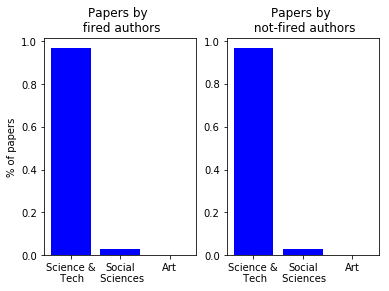

In [22]:
plt.subplot(1,2,1)
plt.bar(cases_fdict.keys(), cases_fdict.values(),color='b')
plt.title('Papers by \n fired authors')
plt.ylabel('% of papers')
plt.subplot(1,2,2)

plt.bar(cases_nfdict.keys(), cases_nfdict.values(),color='b')
plt.title('Papers by \n not-fired authors')


plt.savefig('../images/headings.png')

In [10]:
cases_nf = not_fired['Source'].value_counts()/len(not_fired)
cases_f = fired['Source'].value_counts()/len(fired)

In [11]:
journals_f = {}
journals_f['Turkey'] = 0
journals_f['Asia'] = 0
journals_f['America'] = 0
journals_f['Europe'] = 0

journals_nf = journals_f.copy()
for journal, per in cases_f.iteritems():
    per = per*100
    if('TURK' in journal):
        journals_f['Turkey'] +=per
    elif('AMERICA' in journal):
        journals_f['America'] +=per
    elif('PAKISTAN' in journal or 'SAUDI' in journal or 'ASIA' in journal or 'Chin' in journal):
        journals_f['Asia'] +=per
    elif('EUROPE' in journal):
        journals_f['Europe']+=per
for journal, per in cases_nf.iteritems():
    per = per*100
    if('TURK' in journal):
        journals_nf['Turkey'] +=per
    elif('AMERICA' in journal):
        journals_nf['America'] +=per
    elif('PAKISTAN' in journal or 'SAUDI' in journal or 'ASIA' in journal or 'Chin' in journal):
        journals_nf['Asia'] +=per
    elif('EUROPE' in journal):
        journals_nf['Europe']+=per
              
        

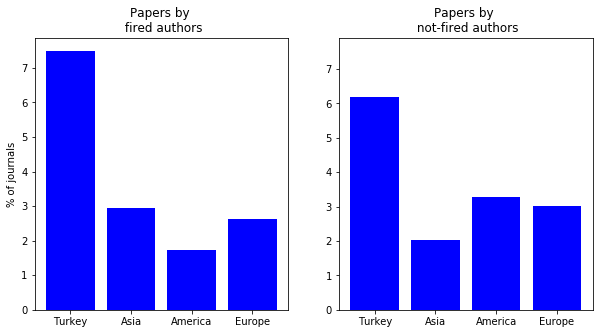

In [20]:
plt.figure(figsize= (10,5))
plt.subplot(1,2,1)
plt.bar(journals_f.keys(), journals_f.values(),color='b')
plt.title('Papers by \n fired authors')
plt.ylabel('% of journals')

plt.subplot(1,2,2)
plt.bar(journals_nf.keys(), journals_nf.values(),color='b')
plt.title('Papers by \n not-fired authors')
plt.ylim([0,7.9])

plt.savefig('../images/sources.png')

In [13]:
network_pd = pd.read_csv('../data/network.csv')

In [14]:
network_pd

,Unnamed: 0,Author,Connections,Connections_id,Connections_label,Label,Connections_fired,Connections_nofired
0,0,SARAC CEMAL,['SARAC CEMAL'],[],[],1,0,0
1,1,KOPARAL MAHMUT,"['KOPARAL MAHMUT', 'KOSE IBRAHIM', 'ATALAY YUS...","[2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 4...","[1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, ...",0,15,66
2,2,KOSE IBRAHIM,"['KOPARAL MAHMUT', 'KOSE IBRAHIM', 'ATALAY YUS...","[1, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 4...","[0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, ...",1,14,67
3,3,ATALAY YUSUF,"['KOPARAL MAHMUT', 'KOSE IBRAHIM', 'ATALAY YUS...","[1, 2, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 4...","[0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, ...",1,14,67
4,4,CAKMAK OMER,"['KOPARAL MAHMUT', 'KOSE IBRAHIM', 'ATALAY YUS...","[1, 2, 3, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 4...","[1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, ...",0,15,66
5,5,ALAN HILAL,"['KOPARAL MAHMUT', 'KOSE IBRAHIM', 'ATALAY YUS...","[1, 2, 3, 4, 6, 7, 8, 9, 10, 11, 12, 13, 14, 4...","[1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, ...",0,15,66
6,6,AGACAYAK KAMIL,"['KOPARAL MAHMUT', 'KOSE IBRAHIM', 'ATALAY YUS...","[1, 2, 3, 4, 5, 7, 8, 9, 10, 11, 12, 13, 14, 4...","[1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, ...",0,15,66
7,7,ERDOGDU IBRAHIM,"['KOPARAL MAHMUT', 'KOSE IBRAHIM', 'ATALAY YUS...","[1, 2, 3, 4, 5, 6, 8, 9, 10, 11, 12, 13, 14, 4...","[1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, ...",0,15,66
8,8,GULSUN BELGIN,"['KOPARAL MAHMUT', 'KOSE IBRAHIM', 'ATALAY YUS...","[1, 2, 3, 4, 5, 6, 7, 9, 10, 11, 12, 13, 14, 4...","[1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, ...",0,15,66
9,9,BOZKURT MEHMET,"['ATALAY YUSUF', 'BOZKURT MEHMET', 'GONUL YUCE...","[3, 10, 4, 6, 2, 11, 12, 13, 14, 3392, 3393, 3...","[1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, ...",0,54,217


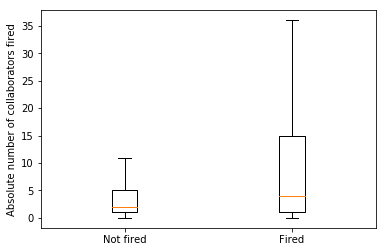

In [15]:

v_fired = network_pd[network_pd['Label']==1]
v_noFired = network_pd[network_pd['Label']==0]

#Box plot with quantiles 

plt.boxplot([v_noFired['Connections_fired'], v_fired['Connections_fired']], labels=['Not fired', 'Fired'],showfliers =False)
plt.ylabel('Absolute number of collaborators fired')
plt.savefig('colaborators.png')

In [16]:
epsilon = 0.001
#Correlation between label and percentage of connections fired
rho1, p_value1 = scipy.stats.pearsonr( np.array(network['Connections_fired'])/(np.array(network['Connections_nofired'])+epsilon+np.array(network['Connections_fired'])), network['Label'])

#Correlation between label and absolute number of connections fired
rho2, p_value2 = scipy.stats.pearsonr(network['Label'], network['Connections_fired'])

#Correlation between label and absolute number of connections fired
rho3, p_value3 = scipy.stats.pearsonr(network['Label'], network['Connections_nofired'])

NameError: name 'scipy' is not defined

In [ ]:
print(rho1)
print(rho2)
print(rho3)

In [ ]:
#Average number of connections
n_con = 0
for connections in network_pd['Connections_id']:
    n_con += len(connections.split())
n_av = n_con / len(network_pd)
print('The average number of connections is: ', n_av)

In [ ]:
#Lastly, is there a relationship between number of publications and getting fired?
data = pd.read_csv('../data/data_preprocessed.csv')

In [ ]:
v_fired = data[data['Label']==1]
v_noFired = data[data['Label']==0]

In [ ]:
len(data)/2

In [ ]:
#Average number of publications per researcher
np.mean(data['No titles'])

In [ ]:
#Box plot with quantiles 

plt.boxplot([v_noFired['No titles'], v_fired['No titles']], labels=['Not fired', 'Fired'],showfliers =False)
plt.ylabel('Number of publications on WebOfScience')
plt.savefig('Nopublications.png')

In [ ]:
rho4, p_value4 = scipy.stats.pearsonr( data['No titles'], data['Label'])


In [ ]:
rho4